# Sandbox

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata as ad
import scanpy as sc

import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)  # only tells me about my GPUs

In [4]:
# adata = ad.read_h5ad("/Users/tim.treis/Documents/GitHub/jumpcp/data/jump_target2_spherized.h5ad")
adata = ad.read_h5ad("/home/icb/tim.treis/projects/2024_JUMP_CellProfiler/data/target2_wellres_featuresimputed_druginfoadded_pycytominer.h5ad")

adata

AnnData object with n_obs × n_vars = 64464 × 591
    obs: 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_Batch', 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_InChIKey_standardized', 'Metadata_SMILES_standardized', 'Metadata_InChI_standardized', 'Metadata_pubchem_cid', 'Metadata_pert_iname', 'Metadata_clinical_phase', 'Metadata_target', 'Metadata_disease_area', 'Metadata_indication', 'Metadata_moa', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
import scib
from scib.metrics import access_label_exploitation
import scvi

@access_label_exploitation
def run_scgen(adata: ad.AnnData, batch_key: str, label_key: str):
    return scib.ig.scgen(
        adata=adata, batch=batch_key, cell_type=label_key, epochs=5
    )

adata_corrected, adata_renamed_corrected = run_scgen(adata=adata, batch_key="Metadata_Source", label_key="Metadata_JCP2022")


/ictstr01/home/icb/tim.treis/projects/broad_integrate/scib/scib/metrics/label_exploitation.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in adata.obs.groupby(batch_key):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB MIG 3g.20gb') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-4775c8c7-ec5c-5016-acb5-777b81fcc1ba]
SLURM auto-

Epoch 5/5: 100%|██████████| 5/5 [01:12<00:00, 12.54s/it, v_num=1, train_loss_step=6.89e+3, train_loss_epoch=1.23e+4]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [01:12<00:00, 14.57s/it, v_num=1, train_loss_step=6.89e+3, train_loss_epoch=1.23e+4]


/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:268: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_shared_ann = AnnData.concatenate(


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:287: ImplicitModificationWarning: Setting element `.obsm['latent']` of view, initializing view as actual.
  corrected.obsm["latent"] = all_shared_ann[corrected.obs_names,:].X
/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 2 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-4775c8c7-ec5c-5016-acb5-777b81fcc1ba]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers whi

Epoch 5/5: 100%|██████████| 5/5 [00:56<00:00, 11.68s/it, v_num=1, train_loss_step=2.7e+3, train_loss_epoch=1.15e+4] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:56<00:00, 11.37s/it, v_num=1, train_loss_step=2.7e+3, train_loss_epoch=1.15e+4]


/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:268: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_shared_ann = AnnData.concatenate(
/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:293: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_not_shared_ann = AnnData.concatenate(
/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:296: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedo

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:317: ImplicitModificationWarning: Setting element `.obsm['latent']` of view, initializing view as actual.
  corrected.obsm["latent"] = all_corrected_data[corrected.obs_names,:].X
/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:224: UserWarning: Category 2 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  new_mapping = _make_column_categorical(


In [16]:
adata_corrected.obs[["Metadata_pert_iname", "Metadata_JCP2022"]].query("'mcoppb' in Metadata_pert_iname")

,Metadata_pert_iname,Metadata_JCP2022
source_10__Dest210726-160150__A09,mcoppb,JCP2022_014367
source_10__Dest210727-153003__A09,mcoppb,JCP2022_014367
source_10__Dest210803-153958__A09,mcoppb,JCP2022_014367
source_10__Dest210809-134534__A09,mcoppb,JCP2022_014367
source_10__Dest210810-173723__A09,mcoppb,JCP2022_014367
...,...,...
source_9__GR00004395__R41,mcoppb,JCP2022_014367
source_9__GR00004409__B17,mcoppb,JCP2022_014367
source_9__GR00004409__B41,mcoppb,JCP2022_014367
source_9__GR00004409__R17,mcoppb,JCP2022_014367


In [8]:
sc.pp.neighbors(adata_corrected)
sc.tl.umap(adata_corrected)

/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 591 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


<Axes: title={'center': 'drug_to_color'}, xlabel='X_umap1', ylabel='X_umap2'>

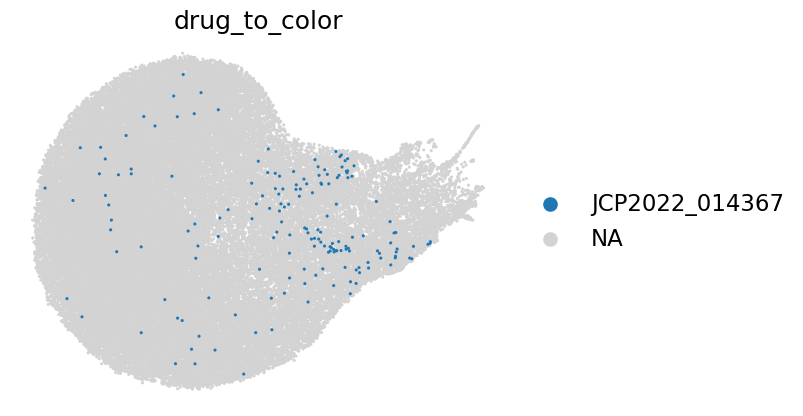

In [18]:
drugs_to_color = ["JCP2022_014367"]

adata_corrected.obs["drug_to_color"] = [
    drug if drug in drugs_to_color else "Other"
    for drug in adata_corrected.obs["Metadata_JCP2022"].values
]
sc.pl.embedding(
    adata_corrected,
    "X_umap",
    color="drug_to_color",
    groups=drugs_to_color,
    palette="tab20",
    s=20,
    frameon=False,
    show=False,
)

In [10]:
sc.pp.neighbors(adata_renamed_corrected)
sc.tl.umap(adata_renamed_corrected)

/home/icb/tim.treis/miniconda/envs/scib/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 591 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


<Axes: title={'center': 'drug_to_color'}, xlabel='X_umap1', ylabel='X_umap2'>

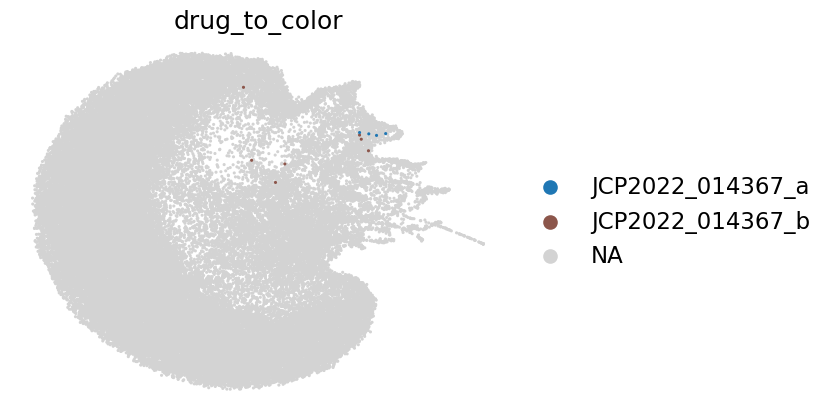

In [17]:
drugs_to_color = ["JCP2022_014367_a", "JCP2022_014367_b"]

adata_renamed_corrected.obs["drug_to_color"] = [
    drug if drug in drugs_to_color else "Other"
    for drug in adata_renamed_corrected.obs["Metadata_JCP2022"].values
]
sc.pl.embedding(
    adata_renamed_corrected,
    "X_umap",
    color="drug_to_color",
    groups=drugs_to_color,
    palette="tab20",
    s=20,
    frameon=False,
    show=False,
)